In [1]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import datetime
from datetime import datetime as dt
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
pd.set_option('max_columns', 100)
pd.set_option('max_rows', 100)
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
engine = create_engine("sqlite:///mta_data.db")

In [3]:
df = pd.read_sql('SELECT * FROM mta_data;', engine)

In [4]:
# Number of stations
station_count = pd.read_sql('''SELECT COUNT(DISTINCT STATION) AS stations
                                            FROM mta_data;''', engine)

station_count

,stations
0,379


In [5]:
# Look at how time is being counted
time_list = pd.read_sql('''SELECT DISTINCT "TIME" AS time_list
                            FROM mta_data
                            LIMIT 30;''', engine)
time_list

,time_list
0,03:00:00
1,07:00:00
2,11:00:00
3,15:00:00
4,19:00:00
5,23:00:00
6,01:00:00
7,05:00:00
8,09:00:00
9,13:00:00


In [6]:
# Unique values of desc
desc_unique_values = pd.read_sql('''SELECT DISTINCT DESC AS unique_values
                                            FROM mta_data;''', engine)

desc_unique_values

,unique_values
0,REGULAR
1,RECOVR AUD


In [7]:
# Get data for use in turnstile analysis
filtered_data = pd.read_sql('''SELECT STATION, "C/A", UNIT, SCP, "DATE", "TIME", "DESC", ENTRIES, EXITS
                                FROM mta_data
                                WHERE ENTRIES IS NOT NULL and EXITS IS NOT NULL
                                ORDER BY STATION, "C/A", UNIT, SCP, "DATE","TIME";''', engine)

In [8]:
filtered_data

,STATION,C/A,UNIT,SCP,DATE,TIME,DESC,ENTRIES,EXITS
0,1 AV,H007,R248,00-00-00,09/25/2021,00:00:00,REGULAR,15629798,18088480
1,1 AV,H007,R248,00-00-00,09/25/2021,04:00:00,REGULAR,15629818,18088663
2,1 AV,H007,R248,00-00-00,09/25/2021,08:00:00,REGULAR,15629836,18088846
3,1 AV,H007,R248,00-00-00,09/25/2021,12:00:00,REGULAR,15629915,18089265
4,1 AV,H007,R248,00-00-00,09/25/2021,16:00:00,REGULAR,15630074,18089829
...,...,...,...,...,...,...,...,...,...
2732598,ZEREGA AV,R419,R326,00-05-01,12/24/2021,04:00:00,REGULAR,39,259
2732599,ZEREGA AV,R419,R326,00-05-01,12/24/2021,08:00:00,REGULAR,39,259
2732600,ZEREGA AV,R419,R326,00-05-01,12/24/2021,12:00:00,REGULAR,39,259
2732601,ZEREGA AV,R419,R326,00-05-01,12/24/2021,16:00:00,REGULAR,39,259


In [9]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2732603 entries, 0 to 2732602
Data columns (total 9 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   STATION  object
 1   C/A      object
 2   UNIT     object
 3   SCP      object
 4   DATE     object
 5   TIME     object
 6   DESC     object
 7   ENTRIES  int64 
 8   EXITS    int64 
dtypes: int64(2), object(7)
memory usage: 187.6+ MB


In [10]:
filtered_data.describe().style.format('{:0.1f}')

,ENTRIES,EXITS
count,2732603.0,2732603.0
mean,42017940.6,33863906.6
std,220469201.1,194582395.6
min,0.0,0.0
25%,233055.0,114415.0
50%,1369239.0,855522.0
75%,6007727.0,3992825.0
max,2147375153.0,2122704407.0


In [11]:
filtered_data.shape

(2732603, 9)

In [12]:
df["date_time"] = pd.to_datetime(df.DATE + " " + df.TIME, format="%m/%d/%Y %H:%M:%S") #create date_time column

In [13]:
df.columns = [column.strip().lower().replace('/','_') for column in df.columns] #reformat

In [14]:
df.tail(30)

,c_a,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time
2732573,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/27/2021,01:00:00,REGULAR,5554,648,2021-09-27 01:00:00
2732574,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/27/2021,05:00:00,REGULAR,5554,648,2021-09-27 05:00:00
2732575,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/27/2021,09:00:00,REGULAR,5554,648,2021-09-27 09:00:00
2732576,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/27/2021,13:00:00,REGULAR,5554,648,2021-09-27 13:00:00
2732577,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/27/2021,17:00:00,REGULAR,5554,649,2021-09-27 17:00:00
2732578,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/27/2021,21:00:00,REGULAR,5554,649,2021-09-27 21:00:00
2732579,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/28/2021,01:00:00,REGULAR,5554,649,2021-09-28 01:00:00
2732580,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/28/2021,05:00:00,REGULAR,5554,649,2021-09-28 05:00:00
2732581,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/28/2021,09:00:00,REGULAR,5554,649,2021-09-28 09:00:00
2732582,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/28/2021,13:00:00,REGULAR,5554,649,2021-09-28 13:00:00


In [15]:
# Remove duplicates
print("prior shape: ", df.shape)
df.drop_duplicates(subset=["station", "date_time",'c_a','unit','scp'],inplace=True)
print("post shape: ", df.shape)

prior shape:  (2732603, 12)
post shape:  (2732548, 12)


In [16]:
#check for duplicates
(df
 .groupby(["c_a", "unit", "scp", "station", "date_time"])
 .entries.count()
 .reset_index()
 .sort_values("entries", ascending=False))

,c_a,unit,scp,station,date_time,entries
0,A002,R051,02-00-00,59 ST,2021-09-25 00:00:00,1
1821692,R141,R031,00-03-02,34 ST-PENN STA,2021-12-21 15:00:00,1
1821694,R141,R031,00-03-02,34 ST-PENN STA,2021-12-21 23:00:00,1
1821695,R141,R031,00-03-02,34 ST-PENN STA,2021-12-22 03:00:00,1
1821696,R141,R031,00-03-02,34 ST-PENN STA,2021-12-22 07:00:00,1
...,...,...,...,...,...,...
910850,N128,R200,00-00-03,EUCLID AV,2021-11-11 15:00:00,1
910851,N128,R200,00-00-03,EUCLID AV,2021-11-11 19:00:00,1
910852,N128,R200,00-00-03,EUCLID AV,2021-11-11 23:00:00,1
910853,N128,R200,00-00-03,EUCLID AV,2021-11-12 03:00:00,1


In [17]:
df.loc[df['desc'] == 'RECOVR AUD']

,c_a,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time
4957,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,12/20/2021,16:00:00,RECOVR AUD,425175,1467688,2021-12-20 16:00:00
4958,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,12/20/2021,20:00:00,RECOVR AUD,425283,1468035,2021-12-20 20:00:00
4999,A033,R170,02-00-01,14 ST-UNION SQ,LNQR456W,BMT,12/20/2021,16:00:00,RECOVR AUD,2692260,3446144,2021-12-20 16:00:00
5000,A033,R170,02-00-01,14 ST-UNION SQ,LNQR456W,BMT,12/20/2021,20:00:00,RECOVR AUD,2692480,3446379,2021-12-20 20:00:00
5041,A033,R170,02-00-02,14 ST-UNION SQ,LNQR456W,BMT,12/20/2021,16:00:00,RECOVR AUD,15374936,15028808,2021-12-20 16:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
2730938,S101,R070,00-00-02,ST. GEORGE,1,SRT,09/29/2021,04:00:00,RECOVR AUD,1400219,324,2021-09-29 04:00:00
2730939,S101,R070,00-00-02,ST. GEORGE,1,SRT,09/29/2021,08:00:00,RECOVR AUD,1400318,324,2021-09-29 08:00:00
2730948,S101,R070,00-00-02,ST. GEORGE,1,SRT,09/30/2021,04:00:00,RECOVR AUD,1216784,140,2021-09-30 04:00:00
2730959,S101,R070,00-00-02,ST. GEORGE,1,SRT,10/01/2021,04:00:00,RECOVR AUD,1216979,140,2021-10-01 04:00:00


In [18]:
#Creat time interval column
df['audit_length_hours'] = df.groupby(['c_a', 'unit', 'scp', 'station'])['date_time'].transform(lambda x: x.diff())

In [19]:
df['audit_length_hours'] = df.audit_length_hours.dt.total_seconds() / 3600

In [20]:
df.head()

,c_a,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time,audit_length_hours
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,03:00:00,REGULAR,7672966,2645023,2021-12-18 03:00:00,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,07:00:00,REGULAR,7672969,2645040,2021-12-18 07:00:00,4.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,11:00:00,REGULAR,7672991,2645127,2021-12-18 11:00:00,4.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,15:00:00,REGULAR,7673037,2645193,2021-12-18 15:00:00,4.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,19:00:00,REGULAR,7673097,2645270,2021-12-18 19:00:00,4.0


In [21]:
# Drop Nulls created by previous cell
print("prior shape: ", df.shape)
df.dropna(how='any', inplace=True)
print("post shape: ", df.shape)

prior shape:  (2732548, 13)
post shape:  (2727504, 13)


In [22]:
# Drop unnecessary columns
df = df.drop(['linename', 'division', 'date', 'desc'], axis=1)

In [23]:
df.columns

Index(['c_a', 'unit', 'scp', 'station', 'time', 'entries', 'exits',
       'date_time', 'audit_length_hours'],
      dtype='object')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2727504 entries, 1 to 2732602
Data columns (total 9 columns):
 #   Column              Dtype         
---  ------              -----         
 0   c_a                 object        
 1   unit                object        
 2   scp                 object        
 3   station             object        
 4   time                object        
 5   entries             int64         
 6   exits               int64         
 7   date_time           datetime64[ns]
 8   audit_length_hours  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 208.1+ MB


In [25]:
df.isnull().sum()

c_a                   0
unit                  0
scp                   0
station               0
time                  0
entries               0
exits                 0
date_time             0
audit_length_hours    0
dtype: int64

In [26]:
df.head(20)

,c_a,unit,scp,station,time,entries,exits,date_time,audit_length_hours
1,A002,R051,02-00-00,59 ST,07:00:00,7672969,2645040,2021-12-18 07:00:00,4.0
2,A002,R051,02-00-00,59 ST,11:00:00,7672991,2645127,2021-12-18 11:00:00,4.0
3,A002,R051,02-00-00,59 ST,15:00:00,7673037,2645193,2021-12-18 15:00:00,4.0
4,A002,R051,02-00-00,59 ST,19:00:00,7673097,2645270,2021-12-18 19:00:00,4.0
5,A002,R051,02-00-00,59 ST,23:00:00,7673128,2645283,2021-12-18 23:00:00,4.0
6,A002,R051,02-00-00,59 ST,03:00:00,7673141,2645289,2021-12-19 03:00:00,4.0
7,A002,R051,02-00-00,59 ST,07:00:00,7673146,2645299,2021-12-19 07:00:00,4.0
8,A002,R051,02-00-00,59 ST,11:00:00,7673153,2645360,2021-12-19 11:00:00,4.0
9,A002,R051,02-00-00,59 ST,15:00:00,7673179,2645407,2021-12-19 15:00:00,4.0
10,A002,R051,02-00-00,59 ST,19:00:00,7673218,2645445,2021-12-19 19:00:00,4.0


In [27]:
df.audit_length_hours.unique()

array([4.        , 1.75666667, 0.02166667, ..., 2.7475    , 3.04722222,
       0.95277778])

In [28]:
df.audit_length_hours.value_counts()

 4.000000      2481263
 4.200000       159000
-332.000000      46474
-335.000000       5195
 3.000000         4654
                ...   
-328.033889          1
 3.198056            1
-252.278611          1
-327.950556          1
-332.355278          1
Name: audit_length_hours, Length: 4050, dtype: int64

In [29]:
df = df[df['audit_length_hours']== 4] #Remove all udit_length_hours that aren't = 4

In [30]:
df.audit_length_hours.value_counts()

4.0    2481263
Name: audit_length_hours, dtype: int64

In [31]:
# Create 'DOW' (Day of Week) column from 'DATETIME'
df['dow'] = df[['date_time']]\
    .apply(lambda x: datetime.datetime.strftime(x['date_time'], '%A'), axis=1)

In [32]:
df.head()

,c_a,unit,scp,station,time,entries,exits,date_time,audit_length_hours,dow
1,A002,R051,02-00-00,59 ST,07:00:00,7672969,2645040,2021-12-18 07:00:00,4.0,Saturday
2,A002,R051,02-00-00,59 ST,11:00:00,7672991,2645127,2021-12-18 11:00:00,4.0,Saturday
3,A002,R051,02-00-00,59 ST,15:00:00,7673037,2645193,2021-12-18 15:00:00,4.0,Saturday
4,A002,R051,02-00-00,59 ST,19:00:00,7673097,2645270,2021-12-18 19:00:00,4.0,Saturday
5,A002,R051,02-00-00,59 ST,23:00:00,7673128,2645283,2021-12-18 23:00:00,4.0,Saturday


In [33]:
df.dow.unique()

array(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday'], dtype=object)

In [34]:
#Remove the weekend days
df = df[df['dow'] != 'Saturday']
df = df[df['dow'] != 'Sunday']

In [35]:
df.dow.unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
      dtype=object)

In [36]:
df.head()

,c_a,unit,scp,station,time,entries,exits,date_time,audit_length_hours,dow
12,A002,R051,02-00-00,59 ST,03:00:00,7673254,2645470,2021-12-20 03:00:00,4.0,Monday
13,A002,R051,02-00-00,59 ST,07:00:00,7673256,2645515,2021-12-20 07:00:00,4.0,Monday
14,A002,R051,02-00-00,59 ST,11:00:00,7673289,2645768,2021-12-20 11:00:00,4.0,Monday
15,A002,R051,02-00-00,59 ST,15:00:00,7673355,2645849,2021-12-20 15:00:00,4.0,Monday
16,A002,R051,02-00-00,59 ST,19:00:00,7673522,2645916,2021-12-20 19:00:00,4.0,Monday


In [37]:
df.tail(30)

,c_a,unit,scp,station,time,entries,exits,date_time,audit_length_hours,dow
2732573,TRAM2,R469,00-05-01,RIT-ROOSEVELT,01:00:00,5554,648,2021-09-27 01:00:00,4.0,Monday
2732574,TRAM2,R469,00-05-01,RIT-ROOSEVELT,05:00:00,5554,648,2021-09-27 05:00:00,4.0,Monday
2732575,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09:00:00,5554,648,2021-09-27 09:00:00,4.0,Monday
2732576,TRAM2,R469,00-05-01,RIT-ROOSEVELT,13:00:00,5554,648,2021-09-27 13:00:00,4.0,Monday
2732577,TRAM2,R469,00-05-01,RIT-ROOSEVELT,17:00:00,5554,649,2021-09-27 17:00:00,4.0,Monday
2732578,TRAM2,R469,00-05-01,RIT-ROOSEVELT,21:00:00,5554,649,2021-09-27 21:00:00,4.0,Monday
2732579,TRAM2,R469,00-05-01,RIT-ROOSEVELT,01:00:00,5554,649,2021-09-28 01:00:00,4.0,Tuesday
2732580,TRAM2,R469,00-05-01,RIT-ROOSEVELT,05:00:00,5554,649,2021-09-28 05:00:00,4.0,Tuesday
2732581,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09:00:00,5554,649,2021-09-28 09:00:00,4.0,Tuesday
2732582,TRAM2,R469,00-05-01,RIT-ROOSEVELT,13:00:00,5554,649,2021-09-28 13:00:00,4.0,Tuesday


In [38]:
#df of 1 week to start working with
df_1w = df[(df['date_time'] > '2021-09-26') & (df['date_time'] < '2021-10-02')].copy()

In [39]:
df_1w

,c_a,unit,scp,station,time,entries,exits,date_time,audit_length_hours,dow
2522404,A002,R051,02-00-00,59 ST,00:00:00,7641873,2615358,2021-09-27 00:00:00,4.0,Monday
2522405,A002,R051,02-00-00,59 ST,04:00:00,7641874,2615359,2021-09-27 04:00:00,4.0,Monday
2522406,A002,R051,02-00-00,59 ST,08:00:00,7641896,2615431,2021-09-27 08:00:00,4.0,Monday
2522407,A002,R051,02-00-00,59 ST,12:00:00,7641946,2615569,2021-09-27 12:00:00,4.0,Monday
2522408,A002,R051,02-00-00,59 ST,16:00:00,7642140,2615614,2021-09-27 16:00:00,4.0,Monday
...,...,...,...,...,...,...,...,...,...,...
2732598,TRAM2,R469,00-05-01,RIT-ROOSEVELT,05:00:00,5554,649,2021-10-01 05:00:00,4.0,Friday
2732599,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09:00:00,5554,649,2021-10-01 09:00:00,4.0,Friday
2732600,TRAM2,R469,00-05-01,RIT-ROOSEVELT,13:00:00,5554,649,2021-10-01 13:00:00,4.0,Friday
2732601,TRAM2,R469,00-05-01,RIT-ROOSEVELT,17:00:00,5554,649,2021-10-01 17:00:00,4.0,Friday


In [40]:
df_1w.dow.unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
      dtype=object)

In [41]:
# pd.options.mode.chained_assignment = None  # default='warn'

In [42]:
# Create diff columns to take entries/exits for given time interval
df_1w['entry_diff'] = df_1w.groupby(['c_a', 'unit', 'scp', 'station'], as_index=False)['entries'].transform(lambda x: x.diff())
df_1w['exit_diff'] = df_1w.groupby(['station','c_a', 'unit', 'scp'], as_index=False)['exits'].diff()

In [43]:
df_1w.head()

,c_a,unit,scp,station,time,entries,exits,date_time,audit_length_hours,dow,entry_diff,exit_diff
2522404,A002,R051,02-00-00,59 ST,00:00:00,7641873,2615358,2021-09-27 00:00:00,4.0,Monday,NaN,NaN
2522405,A002,R051,02-00-00,59 ST,04:00:00,7641874,2615359,2021-09-27 04:00:00,4.0,Monday,1.0,1.0
2522406,A002,R051,02-00-00,59 ST,08:00:00,7641896,2615431,2021-09-27 08:00:00,4.0,Monday,22.0,72.0
2522407,A002,R051,02-00-00,59 ST,12:00:00,7641946,2615569,2021-09-27 12:00:00,4.0,Monday,50.0,138.0
2522408,A002,R051,02-00-00,59 ST,16:00:00,7642140,2615614,2021-09-27 16:00:00,4.0,Monday,194.0,45.0


In [44]:
df_1w.dow.unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
      dtype=object)

In [45]:
# Drop Nulls created by previous groupby().diff()
print("prior shape: ", df_1w.shape)
df_1w.dropna(how='any', inplace=True)
print("post shape: ", df_1w.shape)

prior shape:  (139662, 12)
post shape:  (134977, 12)


In [46]:
df_1w.dow.unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
      dtype=object)

In [47]:
#All negative values for entries and exits should be dropped from dataset since values should be accumulative 
len_entry_diffs = df_1w['entry_diff'].shape[0]
len_exit_diffs = df_1w['exit_diff'].shape[0]

negative_entries = df_1w[df_1w['entry_diff'] < 0].shape[0]
negative_exits = df_1w[df_1w['exit_diff'] < 0].shape[0]

print('negative_entries: ', negative_entries)
print('negative_exits: ', negative_exits)

# Drop negatives
print("prior shape: ", df_1w.shape)
df_1w = df_1w.loc[(df_1w['entry_diff'] > 0) & (df_1w['exit_diff'] > 0)]
print("post shape: ", df_1w.shape)

negative_entries:  1347
negative_exits:  860
prior shape:  (134977, 12)
post shape:  (110779, 12)


In [48]:
df_1w.head()

,c_a,unit,scp,station,time,entries,exits,date_time,audit_length_hours,dow,entry_diff,exit_diff
2522405,A002,R051,02-00-00,59 ST,04:00:00,7641874,2615359,2021-09-27 04:00:00,4.0,Monday,1.0,1.0
2522406,A002,R051,02-00-00,59 ST,08:00:00,7641896,2615431,2021-09-27 08:00:00,4.0,Monday,22.0,72.0
2522407,A002,R051,02-00-00,59 ST,12:00:00,7641946,2615569,2021-09-27 12:00:00,4.0,Monday,50.0,138.0
2522408,A002,R051,02-00-00,59 ST,16:00:00,7642140,2615614,2021-09-27 16:00:00,4.0,Monday,194.0,45.0
2522409,A002,R051,02-00-00,59 ST,20:00:00,7642473,2615655,2021-09-27 20:00:00,4.0,Monday,333.0,41.0


In [49]:
df_1w.dow.unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
      dtype=object)

In [50]:
# Create threshold based on total seconds in a day: Assuming that each sec cannot have more than 1 person doing turnstile
threshold_entry = 86400
threshold_exit = 86400

# Drop outliers
print("prior shape: ", df_1w.shape)
df_1w = df_1w[(df_1w['entry_diff'] < threshold_entry) & (df_1w['exit_diff'] < threshold_exit)]
print("post shape: ", df_1w.shape)

prior shape:  (110779, 12)
post shape:  (110777, 12)


In [51]:
# Create 'Impression Per 4hrs" = exits + entries. This will be our ranking metric
df_1w['ip_4hrs'] = df_1w['entry_diff'] + df_1w['exit_diff']
df_1w.sort_values('ip_4hrs', ascending=False).head()

,c_a,unit,scp,station,time,entries,exits,date_time,audit_length_hours,dow,entry_diff,exit_diff,ip_4hrs
2622083,N503,R021,00-00-00,42 ST-BRYANT PK,20:00:00,899302,2860425,2021-09-27 20:00:00,4.0,Monday,604.0,2171.0,2775.0
2527657,A034,R170,03-00-00,14 ST-UNION SQ,17:00:00,2332768,18338566,2021-09-27 17:00:00,4.0,Monday,191.0,2519.0,2710.0
2705134,R415,R120,00-00-00,MORISN AV/SNDVW,08:00:00,536954917,1174644573,2021-10-01 08:00:00,4.0,Friday,944.0,1731.0,2675.0
2718064,R533,R055,00-03-00,FLUSHING-MAIN,16:00:00,17809272,15989756,2021-09-30 16:00:00,4.0,Thursday,1445.0,1103.0,2548.0
2607986,N324,R018,00-03-00,JKSN HT-ROOSVLT,16:00:00,311002,731898,2021-09-28 16:00:00,4.0,Tuesday,897.0,1496.0,2393.0


In [52]:
df_1w.dow.unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
      dtype=object)

In [53]:
df_1w = df_1w.drop(['c_a', 'scp','unit'], axis=1)


In [54]:
#Top 10 station for traffic
df_1w_station_traffic = df_1w.groupby(['station'])['ip_4hrs'].sum().sort_values(ascending = False).head(10)
df_1w_station_traffic = pd.DataFrame(df_1w_station_traffic.reset_index())
df_1w_station_traffic.rename(columns={"ip_4hrs": "total_traffic"}, inplace=True)
df_1w_station_traffic

,station,total_traffic
0,34 ST-PENN STA,639020.0
1,GRD CNTRL-42 ST,520216.0
2,86 ST,470514.0
3,34 ST-HERALD SQ,458607.0
4,14 ST-UNION SQ,444682.0
5,23 ST,435013.0
6,FULTON ST,392776.0
7,125 ST,392423.0
8,42 ST-PORT AUTH,378276.0
9,TIMES SQ-42 ST,350098.0


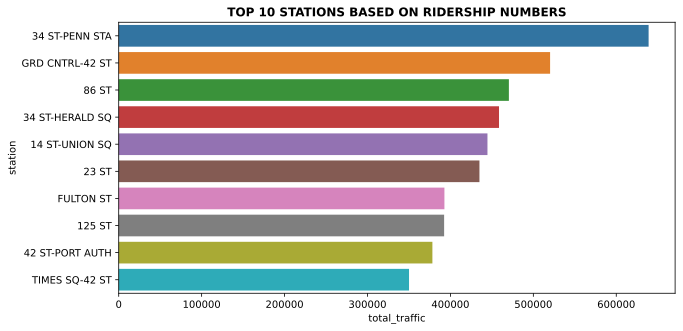

In [55]:
#Plot graph for TOP 10 STATIONS BASED ON RIDERSHIP NUMBERS
plt.figure(figsize=(10,5))
plt.title("TOP 10 STATIONS BASED ON RIDERSHIP NUMBERS", fontweight="bold")
sns.barplot(data= df_1w_station_traffic, y = df_1w_station_traffic.station, x = df_1w_station_traffic.total_traffic);


In [56]:
# Top days of the week for RIDERSHIP NUMBERS
df_1w_DOW = df_1w.groupby(['dow'])['ip_4hrs'].sum().reset_index()
df_mapping = pd.DataFrame({'dow':['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']})
sort_mapping = df_mapping.reset_index().set_index('dow')
df_1w_DOW['dow_reindex'] = df_1w_DOW['dow'].map(sort_mapping['index'])
df_1w_DOW = df_1w_DOW.sort_values('dow_reindex')
df_1w_DOW.rename(columns={"ip_4hrs": "total_traffic"}, inplace=True)
df_1w_DOW

,dow,total_traffic,dow_reindex
1,Monday,4397798.0,0
3,Tuesday,4853331.0,1
4,Wednesday,5040722.0,2
2,Thursday,5141291.0,3
0,Friday,5111034.0,4


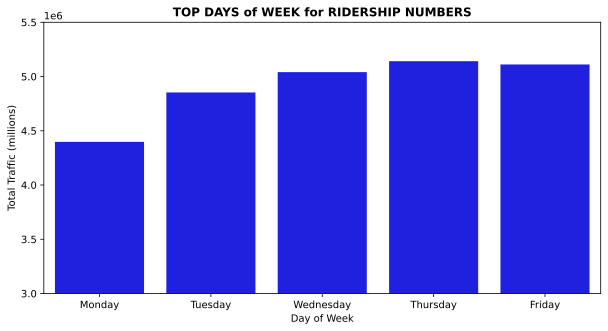

In [57]:
#Plot Top days of the week for RIDERSHIP NUMBERS
plt.figure(figsize=(10,5))
plt.title("TOP DAYS of WEEK for RIDERSHIP NUMBERS", fontweight="bold")
plt.ylim([3000000,5500000])
sns.barplot(data= df_1w_DOW, x = df_1w_DOW.dow, y = df_1w_DOW.total_traffic, color = 'b')
plt.ylabel('Total Traffic (millions)')
plt.xlabel('Day of Week');

In [58]:
df_1w.reset_index().head()

,index,station,time,entries,exits,date_time,audit_length_hours,dow,entry_diff,exit_diff,ip_4hrs
0,2522405,59 ST,04:00:00,7641874,2615359,2021-09-27 04:00:00,4.0,Monday,1.0,1.0,2.0
1,2522406,59 ST,08:00:00,7641896,2615431,2021-09-27 08:00:00,4.0,Monday,22.0,72.0,94.0
2,2522407,59 ST,12:00:00,7641946,2615569,2021-09-27 12:00:00,4.0,Monday,50.0,138.0,188.0
3,2522408,59 ST,16:00:00,7642140,2615614,2021-09-27 16:00:00,4.0,Monday,194.0,45.0,239.0
4,2522409,59 ST,20:00:00,7642473,2615655,2021-09-27 20:00:00,4.0,Monday,333.0,41.0,374.0


In [59]:
df_mapping = pd.DataFrame({'dow':['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']})
sort_mapping = df_mapping.reset_index().set_index('dow')
df_1w['dow_reindex'] = df_1w['dow'].map(sort_mapping['index'])
df_1w = df_1w.sort_values('dow_reindex')
df_1w.head()

,station,time,entries,exits,date_time,audit_length_hours,dow,entry_diff,exit_diff,ip_4hrs,dow_reindex
2522405,59 ST,04:00:00,7641874,2615359,2021-09-27 04:00:00,4.0,Monday,1.0,1.0,2.0,0
2606542,46 ST,13:00:00,931260,411922,2021-09-27 13:00:00,4.0,Monday,80.0,39.0,119.0,0
2606541,46 ST,09:00:00,931180,411883,2021-09-27 09:00:00,4.0,Monday,97.0,25.0,122.0,0
2606540,46 ST,05:00:00,931083,411858,2021-09-27 05:00:00,4.0,Monday,3.0,4.0,7.0,0
2606502,46 ST,21:00:00,970137,4132217,2021-09-27 21:00:00,4.0,Monday,5.0,121.0,126.0,0


In [60]:
top_10_station = ['34 ST-PENN STA', 'GRD CNTRL-42 ST', '86 ST', '34 ST-HERALD SQ', '14 ST-UNION SQ', '23 ST',
                    'FULTON ST', '125 ST', '42 ST-PORT AUTH', 'TIMES SQ-42 ST']

In [61]:
mask = (df_1w.station.isin(top_10_station))
df_top_station = df_1w[mask]
df_top_station.head()

,station,time,entries,exits,date_time,audit_length_hours,dow,entry_diff,exit_diff,ip_4hrs,dow_reindex
2624258,34 ST-HERALD SQ,04:00:00,26620807,1903488,2021-09-27 04:00:00,4.0,Monday,13.0,7.0,20.0,0
2624220,34 ST-HERALD SQ,20:00:00,399955,151754,2021-09-27 20:00:00,4.0,Monday,259.0,82.0,341.0,0
2624219,34 ST-HERALD SQ,16:00:00,399696,151672,2021-09-27 16:00:00,4.0,Monday,141.0,71.0,212.0,0
2624218,34 ST-HERALD SQ,12:00:00,399555,151601,2021-09-27 12:00:00,4.0,Monday,217.0,105.0,322.0,0
2624217,34 ST-HERALD SQ,08:00:00,399338,151496,2021-09-27 08:00:00,4.0,Monday,105.0,63.0,168.0,0


In [101]:
df_top_station_mean = df_top_station.groupby(['station','date_time','time','dow'])['ip_4hrs'].mean().reset_index()
mask = (df_top_station_mean.date_time.dt.hour >= 12) & (df_top_station_mean.date_time.dt.hour <= 23)
df_2_10 = df_top_station_mean[mask]
df_2_10 = df_2_10.sort_values(by='time')
df_2_10.tail(100)

,station,date_time,time,dow,ip_4hrs
263,42 ST-PORT AUTH,2021-09-29 18:00:00,18:00:00,Wednesday,480.294118
229,34 ST-PENN STA,2021-10-01 18:00:00,18:00:00,Friday,592.909091
205,34 ST-PENN STA,2021-09-29 18:00:00,18:00:00,Wednesday,539.772727
181,34 ST-PENN STA,2021-09-27 18:00:00,18:00:00,Monday,516.000000
275,42 ST-PORT AUTH,2021-09-30 18:00:00,18:00:00,Thursday,497.647059
359,FULTON ST,2021-09-27 19:00:00,19:00:00,Monday,254.363636
394,FULTON ST,2021-09-29 19:00:00,19:00:00,Wednesday,284.696970
412,FULTON ST,2021-09-30 19:00:00,19:00:00,Thursday,304.545455
376,FULTON ST,2021-09-28 19:00:00,19:00:00,Tuesday,282.875000
430,FULTON ST,2021-10-01 19:00:00,19:00:00,Friday,282.515152


In [88]:
# mask = (df_2_10['dow'] == 'Monday')
# df_1_day = df_2_10.loc[mask]
# df_1_day = df_1_day.sort_values(by='time') 

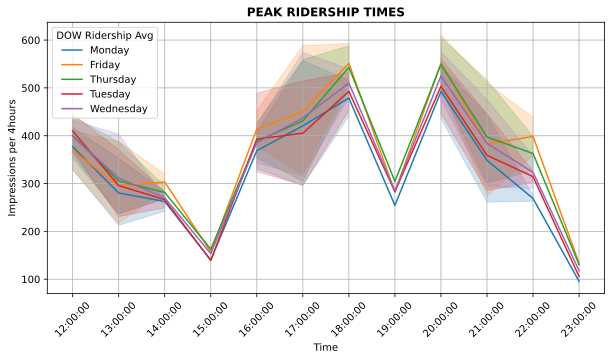

In [97]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df_2_10, x="time", y="ip_4hrs", hue='dow',)
plt.xticks(rotation=45)
plt.grid()
plt.ylabel('Impressions per 4hours')
plt.xlabel('Time')
plt.legend(title='DOW Ridership Avg', loc=2)
plt.title("PEAK RIDERSHIP TIMES", fontweight="bold");

In [111]:
top_3_station = ['34 ST-PENN STA', 'GRD CNTRL-42 ST', '86 ST']
mask = (df_1w.station.isin(top_3_station))
df_top_3 = df_1w[mask]
# df_top_3 = df_top_3.groupby(['station','time'])['ip_4hrs'].sum()
# df_top_3.rename(columns={"ip_4hrs": "total_traffic"}, inplace=True)
df_top_3 = df_top_3.sort_values(by='time')
df_top_3 

,station,time,entries,exits,date_time,audit_length_hours,dow,entry_diff,exit_diff,ip_4hrs,dow_reindex
2547228,86 ST,00:00:00,19940349,11831463,2021-09-29 00:00:00,4.0,Wednesday,97.0,103.0,200.0,2
2573203,86 ST,00:00:00,344372,57788,2021-10-01 00:00:00,4.0,Friday,29.0,14.0,43.0,4
2580120,34 ST-PENN STA,00:00:00,5738369,5788803,2021-09-29 00:00:00,4.0,Wednesday,34.0,18.0,52.0,2
2579400,34 ST-PENN STA,00:00:00,697903,634782,2021-09-28 00:00:00,4.0,Tuesday,3.0,36.0,39.0,1
2690659,86 ST,00:00:00,119152,30988,2021-09-29 00:00:00,4.0,Wednesday,27.0,3.0,30.0,2
...,...,...,...,...,...,...,...,...,...,...,...
2662549,34 ST-PENN STA,22:00:00,1154491085,1116149003,2021-09-29 22:00:00,4.0,Wednesday,145.0,44.0,189.0,2
2661212,34 ST-PENN STA,22:00:00,1234216,378501,2021-09-30 22:00:00,4.0,Thursday,333.0,186.0,519.0,3
2662633,34 ST-PENN STA,22:00:00,801136,2500675,2021-09-29 22:00:00,4.0,Wednesday,105.0,190.0,295.0,2
2662585,34 ST-PENN STA,22:00:00,7523469,6654660,2021-09-28 22:00:00,4.0,Tuesday,137.0,100.0,237.0,1


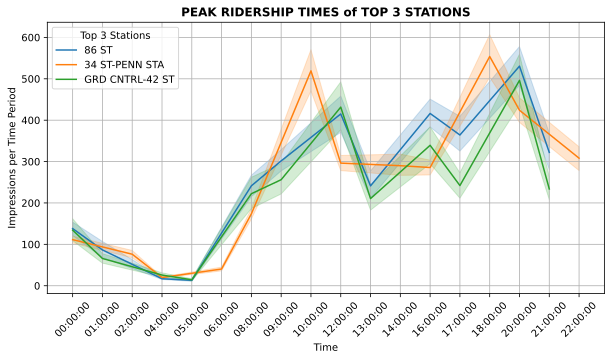

In [112]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df_top_3, x="time", y="ip_4hrs", hue='station',)
plt.xticks(rotation=45)
plt.grid()
plt.ylabel('Impressions per Time Period')
plt.xlabel('Time')
plt.legend(title='Top 3 Stations', loc=0)
plt.title("PEAK RIDERSHIP TIMES of TOP 3 STATIONS", fontweight="bold");